#importing all the required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
import xml.etree.ElementTree as xet
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
from paddleocr import PaddleOCR,draw_ocr
import tensorflow
from tensorflow.keras.preprocessing.image import load_img,img_to_array

#creating new directories to stores xml files and jpg files (optional)

In [3]:
filepath=[]
path1 = os.path.join(os.getcwd(),'images')
for filenames in  os.listdir(path1):
    if not filenames.endswith('xml'):
        img_file = os.path.join(path1,filenames)
        img_file_path = os.path.join(os.getcwd(),'jpg_files')
        os.makedirs(img_file_path,exist_ok=True)
        shutil.copy(img_file,img_file_path)
    
    if filenames.endswith('xml'):
        img_file = os.path.join(path1,filenames)
        img_file_path = os.path.join(os.getcwd(),'xml_files')
        os.makedirs(img_file_path,exist_ok=True)
        shutil.copy(img_file,img_file_path)
        
    
    elif not filenames.endswith(('xml','.txt')): 
        filepath.append(os.path.join(path1,filenames))
filepath      

['c:\\Zeeshan\\Vscode_projects\\Number_plate_detection\\images\\N1.jpeg',
 'c:\\Zeeshan\\Vscode_projects\\Number_plate_detection\\images\\N100.jpeg',
 'c:\\Zeeshan\\Vscode_projects\\Number_plate_detection\\images\\N101.jpeg',
 'c:\\Zeeshan\\Vscode_projects\\Number_plate_detection\\images\\N102.jpeg',
 'c:\\Zeeshan\\Vscode_projects\\Number_plate_detection\\images\\N103.jpeg',
 'c:\\Zeeshan\\Vscode_projects\\Number_plate_detection\\images\\N104.jpeg',
 'c:\\Zeeshan\\Vscode_projects\\Number_plate_detection\\images\\N105.jpeg',
 'c:\\Zeeshan\\Vscode_projects\\Number_plate_detection\\images\\N106.jpeg',
 'c:\\Zeeshan\\Vscode_projects\\Number_plate_detection\\images\\N107.jpeg',
 'c:\\Zeeshan\\Vscode_projects\\Number_plate_detection\\images\\N108.jpeg',
 'c:\\Zeeshan\\Vscode_projects\\Number_plate_detection\\images\\N109.jpeg',
 'c:\\Zeeshan\\Vscode_projects\\Number_plate_detection\\images\\N11.jpeg',
 'c:\\Zeeshan\\Vscode_projects\\Number_plate_detection\\images\\N110.jpeg',
 'c:\\Zeeshan\\

In [4]:
import xml.etree.ElementTree as xet

ob = xet.parse('N1 copy.xml')
root = ob.getroot()
root.find('object').find('bndbox').find('xmin').text

root.find('size').find('depth').text

'3'

#Extracting information from xml files like xmin,xmax,ymin,ymax ,filepath and filename in a dataframe

In [5]:
import pandas as pd
import os
import shutil

path = os.path.join(os.getcwd(),'images')
find_files = os.listdir(path)

xmin1=[]
xmax1=[]
ymin1=[]
ymax1=[]
xml_file_location=[]
filename1=[]
jpg_file_location=[]


for files in find_files:
    if files.endswith('xml'):
        xml_files = os.path.join(path,files)
        data = xet.parse(xml_files)
        root = data.getroot()
        object1 = root.find('object')
        xmin = object1.find('bndbox').find('xmin').text    
        xmax = object1.find('bndbox').find('xmax').text  
        ymin = object1.find('bndbox').find('ymin').text  
        ymax = object1.find('bndbox').find('ymax').text  
        filename = root.find('filename').text
        xml_file_location1 = root.find('path').text


        xmin1.append(xmin)
        xmax1.append(xmax)
        ymin1.append(ymax)
        ymax1.append(ymin)
        xml_file_location.append(xml_file_location1)
        filename1.append(filename)
    
    if not files.endswith(('xml','.txt')):
        jpg_files = os.path.join(path,files)
        jpg_file_location.append(jpg_files)
    

df = pd.DataFrame({'xml_filepath':xml_file_location,'jpg_file_path':jpg_file_location,'xmin':xmin1,'xmax':xmax1,'ymin':ymin1,'ymax':ymax1,'filename':filename1})
df

,xml_filepath,jpg_file_path,xmin,xmax,ymin,ymax,filename
0,/Users/asik/Desktop/ANPR/images/N1.jpeg,c:\Zeeshan\Vscode_projects\Number_plate_detect...,1093,1396,727,645,N1.jpeg
1,/Users/asik/Desktop/ANPR/images/N100.jpeg,c:\Zeeshan\Vscode_projects\Number_plate_detect...,134,301,350,312,N100.jpeg
2,/Users/asik/Desktop/ANPR/images/N101.jpeg,c:\Zeeshan\Vscode_projects\Number_plate_detect...,31,139,161,128,N101.jpeg
3,/Users/asik/Desktop/ANPR/images/N102.jpeg,c:\Zeeshan\Vscode_projects\Number_plate_detect...,164,316,243,216,N102.jpeg
4,/Users/asik/Desktop/ANPR/images/N103.jpeg,c:\Zeeshan\Vscode_projects\Number_plate_detect...,813,1067,724,665,N103.jpeg
...,...,...,...,...,...,...,...
220,/Users/asik/Desktop/ANPR/images/N95.jpeg,c:\Zeeshan\Vscode_projects\Number_plate_detect...,23,408,391,173,N95.jpeg
221,/Users/asik/Desktop/ANPR/images/N96.jpeg,c:\Zeeshan\Vscode_projects\Number_plate_detect...,137,352,186,141,N96.jpeg
222,/Users/asik/Desktop/ANPR/images/N97.jpeg,c:\Zeeshan\Vscode_projects\Number_plate_detect...,175,290,255,228,N97.jpeg
223,/Users/asik/Desktop/ANPR/images/N98.jpeg,c:\Zeeshan\Vscode_projects\Number_plate_detect...,563,675,238,207,N98.jpeg


In [6]:
df.loc[0,'jpg_file_path']

'c:\\Zeeshan\\Vscode_projects\\Number_plate_detection\\images\\N1.jpeg'

In [7]:
df.iloc[0,1]

'c:\\Zeeshan\\Vscode_projects\\Number_plate_detection\\images\\N1.jpeg'

In [8]:
filepath[0]

'c:\\Zeeshan\\Vscode_projects\\Number_plate_detection\\images\\N1.jpeg'

Text(0.5, 0, 'figure :bouding box')

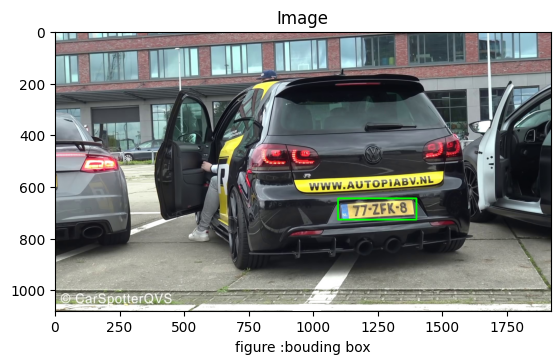

In [9]:
import cv2
import matplotlib.pyplot as plt
img_file =filepath[0] #Taking a random image

img = cv2.imread(img_file)#default bgr format

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert from bgr to rgb
xmin = 1093
xmax = 1396
ymin = 727
ymax = 645
# roi = rgb_img[ymin:ymax,xmin:xmax]

# Draw the bounding box
img = cv2.rectangle(rgb_img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 5)
plt.imshow(img)
plt.title('Image')
plt.xlabel('figure :bouding box')

#Data Preprocessing

In [10]:
img = cv2.imread(filepath[0])
img.shape


(1080, 1920, 3)

In [11]:
df

,xml_filepath,jpg_file_path,xmin,xmax,ymin,ymax,filename
0,/Users/asik/Desktop/ANPR/images/N1.jpeg,c:\Zeeshan\Vscode_projects\Number_plate_detect...,1093,1396,727,645,N1.jpeg
1,/Users/asik/Desktop/ANPR/images/N100.jpeg,c:\Zeeshan\Vscode_projects\Number_plate_detect...,134,301,350,312,N100.jpeg
2,/Users/asik/Desktop/ANPR/images/N101.jpeg,c:\Zeeshan\Vscode_projects\Number_plate_detect...,31,139,161,128,N101.jpeg
3,/Users/asik/Desktop/ANPR/images/N102.jpeg,c:\Zeeshan\Vscode_projects\Number_plate_detect...,164,316,243,216,N102.jpeg
4,/Users/asik/Desktop/ANPR/images/N103.jpeg,c:\Zeeshan\Vscode_projects\Number_plate_detect...,813,1067,724,665,N103.jpeg
...,...,...,...,...,...,...,...
220,/Users/asik/Desktop/ANPR/images/N95.jpeg,c:\Zeeshan\Vscode_projects\Number_plate_detect...,23,408,391,173,N95.jpeg
221,/Users/asik/Desktop/ANPR/images/N96.jpeg,c:\Zeeshan\Vscode_projects\Number_plate_detect...,137,352,186,141,N96.jpeg
222,/Users/asik/Desktop/ANPR/images/N97.jpeg,c:\Zeeshan\Vscode_projects\Number_plate_detect...,175,290,255,228,N97.jpeg
223,/Users/asik/Desktop/ANPR/images/N98.jpeg,c:\Zeeshan\Vscode_projects\Number_plate_detect...,563,675,238,207,N98.jpeg


In [12]:
labels = df.iloc[:,2:6].values
labels

array([['1093', '1396', '727', '645'],
       ['134', '301', '350', '312'],
       ['31', '139', '161', '128'],
       ['164', '316', '243', '216'],
       ['813', '1067', '724', '665'],
       ['66', '154', '197', '166'],
       ['360', '434', '195', '174'],
       ['137', '262', '290', '249'],
       ['207', '356', '287', '174'],
       ['184', '342', '257', '220'],
       ['148', '239', '320', '250'],
       ['131', '187', '144', '130'],
       ['183', '249', '227', '211'],
       ['80', '239', '402', '364'],
       ['179', '347', '290', '256'],
       ['39', '108', '157', '129'],
       ['15', '200', '126', '33'],
       ['157', '316', '278', '226'],
       ['120', '249', '202', '161'],
       ['532', '852', '706', '636'],
       ['180', '559', '314', '216'],
       ['976', '1284', '754', '669'],
       ['647', '736', '387', '332'],
       ['311', '506', '370', '324'],
       ['342', '494', '288', '243'],
       ['11', '246', '165', '78'],
       ['165', '328', '324', '276'],
     

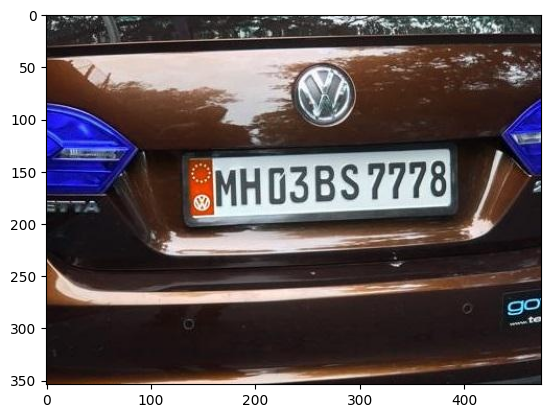

In [13]:
plt.imshow(cv2.imread(df['jpg_file_path'][224]))

In [14]:
cv2.imread(df['jpg_file_path'][224])

array([[[28, 30, 30],
        [43, 45, 45],
        [47, 49, 49],
        ...,
        [53, 58, 57],
        [55, 60, 59],
        [55, 60, 59]],

       [[40, 42, 42],
        [34, 36, 36],
        [36, 38, 38],
        ...,
        [52, 57, 56],
        [56, 61, 60],
        [56, 61, 60]],

       [[38, 40, 40],
        [42, 44, 44],
        [36, 38, 38],
        ...,
        [51, 56, 55],
        [51, 56, 55],
        [51, 56, 55]],

       ...,

       [[57, 26, 11],
        [58, 27, 12],
        [61, 30, 15],
        ...,
        [44, 50, 55],
        [44, 50, 55],
        [44, 50, 55]],

       [[66, 30, 14],
        [67, 31, 15],
        [68, 32, 14],
        ...,
        [42, 47, 50],
        [42, 47, 50],
        [42, 47, 50]],

       [[70, 32, 14],
        [71, 33, 15],
        [74, 34, 15],
        ...,
        [39, 44, 47],
        [42, 47, 50],
        [42, 47, 50]]], dtype=uint8)

In [17]:
img_path = df['jpg_file_path'][0]
load_image = load_img(img_path,target_size=(224,224))
array = img_to_array(load_image)
normal = array/255.0


In [3]:
import tensorflow
from tensorflow.keras.preprocessing.image import load_img,img_to_array
data=[]
output=[]

for index in range(len(df['jpg_file_path'])):
    #Image path
    img_path = df['jpg_file_path'][index]
    
    #Image array
    image_array = cv2.imread(img_path)
    
    #splitting to height,width and depth
    height,width,depth = image_array.shape
    
    load_image = load_img(img_path,target_size=(224,224))
    load_img_array = img_to_array(load_image)
    
    
    #Normalization of the image
    normalized_load_img_array =  load_img_array/255.0
    
    #Normalize xmax,xmin,ymax,ymin
    xmin,xmax,ymin,ymax = labels[index]
    normalized_xmin , normalized_xmax = int(xmin)/width,int(xmax)/width
    normalized_ymin , normalized_ymax = int(ymin)/height,int(ymax)/height
    complete_normalized = normalized_xmin,normalized_xmax,normalized_ymin,normalized_ymax
    
    #Appending input and output data
    data.append(normalized_load_img_array)
    output.append(complete_normalized)

NameError: name 'df' is not defined

In [18]:
data[0]

array([[[0.8352941 , 0.9764706 , 0.96862745],
        [0.8392157 , 1.        , 0.99607843],
        [0.8392157 , 1.        , 0.99607843],
        ...,
        [0.5764706 , 0.44313726, 0.4392157 ],
        [0.57254905, 0.4509804 , 0.44313726],
        [0.64705884, 0.5254902 , 0.5176471 ]],

       [[0.9137255 , 1.        , 1.        ],
        [0.88235295, 1.        , 1.        ],
        [0.87058824, 0.99607843, 0.99215686],
        ...,
        [0.5921569 , 0.4392157 , 0.44313726],
        [0.52156866, 0.3882353 , 0.39215687],
        [0.54901963, 0.41568628, 0.41960785]],

       [[0.89411765, 0.99215686, 0.9764706 ],
        [0.8980392 , 1.        , 0.99607843],
        [0.88235295, 1.        , 1.        ],
        ...,
        [0.5529412 , 0.39607844, 0.4       ],
        [0.5647059 , 0.4117647 , 0.42352942],
        [0.5411765 , 0.4       , 0.40784314]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 0.99215686],
        [0.9882353 , 0

In [19]:
output[0]

(0.5692708333333333,
 0.7270833333333333,
 0.6731481481481482,
 0.5972222222222222)

#Splitting Data into train and test

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
X = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

#Splitting and check the shape of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((180, 224, 224, 3), (45, 224, 224, 3), (180, 4), (45, 4))

In [21]:
X_train[179]

array([[[0.63529414, 0.61960787, 0.5764706 ],
        [0.63529414, 0.627451  , 0.5803922 ],
        [0.654902  , 0.64705884, 0.6       ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.        , 0.        , 0.        ]],

       [[0.63529414, 0.61960787, 0.5764706 ],
        [0.64705884, 0.6392157 , 0.5921569 ],
        [0.6509804 , 0.6431373 , 0.59607846],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.6313726 , 0.6156863 , 0.5686275 ],
        [0.6431373 , 0.63529414, 0.58431375],
        [0.6509804 , 0.6431373 , 0.5921569 ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.1882353 , 0.07843138, 0.06666667],
        [0.17254902, 0.10588235, 0.07843138],
        [0.14509805, 0

#Prepare Base Model 

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense,Dropout,Flatten,Input

In [5]:
inception_renet = InceptionResNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))
output_model = inception_renet.output
output_model = Flatten()(output_model)
output_model = Dense(600,activation='relu')(output_model)
output_model = Dense(300,activation='relu')(output_model)
output_model = Dense(4,activation='sigmoid')(output_model)

In [6]:
model = Model(inputs=inception_renet.input,outputs=output_model)

In [7]:
#Compile our Model
import tensorflow
model.compile(loss='mse',optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-5),metrics=['accuracy'])

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

Model Training

In [27]:
tensorboard = TensorBoard('object detection')
history = model.fit(x=X_train,y=y_train,batch_size=8,epochs=200,validation_data=(X_test,y_test),callbacks=[tensorboard])

Epoch 1/200
23/23 [==============================] - 37s 565ms/step - loss: 0.0322 - accuracy: 0.4611 - val_loss: 0.0266 - val_accuracy: 0.6222
Epoch 2/200
23/23 [==============================] - 7s 304ms/step - loss: 0.0151 - accuracy: 0.6500 - val_loss: 0.0236 - val_accuracy: 0.6667
Epoch 3/200
23/23 [==============================] - 7s 305ms/step - loss: 0.0085 - accuracy: 0.7556 - val_loss: 0.0226 - val_accuracy: 0.6667
Epoch 4/200
23/23 [==============================] - 7s 305ms/step - loss: 0.0074 - accuracy: 0.7500 - val_loss: 0.0177 - val_accuracy: 0.6889
Epoch 5/200
23/23 [==============================] - 7s 305ms/step - loss: 0.0065 - accuracy: 0.7833 - val_loss: 0.0172 - val_accuracy: 0.7111
Epoch 6/200
23/23 [==============================] - 7s 306ms/step - loss: 0.0054 - accuracy: 0.8222 - val_loss: 0.0155 - val_accuracy: 0.7111
Epoch 7/200
23/23 [==============================] - 7s 305ms/step - loss: 0.0057 - accuracy: 0.7944 - val_loss: 0.0146 - val_accuracy: 0.711

Saving model 

In [ ]:
os.makedirs('models',exist_ok=True)
model.save('models/num_plate.h5')

Perform Prediction

In [6]:
#loading model 
import os
import tensorflow
from tensorflow.keras.preprocessing.image import load_img,img_to_array
model = tensorflow.keras.models.load_model('num_plate.h5')

In [19]:
def object_detection(img_path):
    try:
        from pathlib import Path
        
        img = cv2.imread(img_path)

        #splitting to height,width and depth
        height,width,depth = img.shape

        # Loading the image as a TensorFlow image
        tensor_img = load_img(img_path, target_size=(224, 224))
        array_img = img_to_array(tensor_img)

        # Reshaping and normalizing the image
        reshape_img = array_img.reshape(-1, 224, 224, 3)
        normal_image = reshape_img / 255.0

        result = model.predict(normal_image)

        # Getting the points from the model
        xmin, xmax, ymin, ymax = result[0]
        xmin, xmax = xmin * width, xmax * width
        ymin, ymax = ymin * height, ymax * height
        xmin,xmax,ymin,ymax = int(xmin),int(xmax),int(ymin),int(ymax)
        pt1 = int(xmin), int(ymin)
        pt2 = int(xmax), int(ymax)

        img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img2 = cv2.rectangle(img1, pt1, pt2, (0, 255, 0), 5)
        
        os.makedirs('predictions',exist_ok=True)

        output_path = os.path.join(os.getcwd(),'predictions')
        filename = img_path.split('\\')[-1]
        final_prediction_path = os.path.join(output_path,filename)
#         Path(final_prediction_path)
        cv2.imwrite(final_prediction_path, img2)
#         print(pt1,pt2)
        
        os.makedirs('predictions_roi',exist_ok=True)
        roi_img = img2[ymax:ymin,xmin:xmax]
        prediction_roi_dir_file = os.path.join(os.getcwd(),'predictions_roi',filename)
#         print(prediction_roi_dir_file)
        cv2.imwrite(prediction_roi_dir_file,roi_img)
        
        
        
      
       
        print(f'predicted number plate is saved at {prediction_roi_dir_file}')
        return f'predicted Image saved at {final_prediction_path}'
        
    except Exception as e:
        print(e)


In [20]:
#Predictions
path = os.getcwd()
for files in os.listdir(path):
    if files.endswith(('.jpeg','.png')):
        files_path = os.path.join(path,files)
        object_detection(files_path)

1/1 [==============================] - 0s 26ms/step
predicted number plate is saved at C:\Zeeshan\Vscode_projects\Number_plate_detection\predictions_roi\N176.jpeg
1/1 [==============================] - 0s 31ms/step
predicted number plate is saved at C:\Zeeshan\Vscode_projects\Number_plate_detection\predictions_roi\N183.jpeg
1/1 [==============================] - 0s 52ms/step
predicted number plate is saved at C:\Zeeshan\Vscode_projects\Number_plate_detection\predictions_roi\N20.jpeg
1/1 [==============================] - 0s 47ms/step
predicted number plate is saved at C:\Zeeshan\Vscode_projects\Number_plate_detection\predictions_roi\N36.jpeg


filepath -->C:\Zeeshan\Vscode_projects\Number_plate_detection\predictions\N176.jpeg


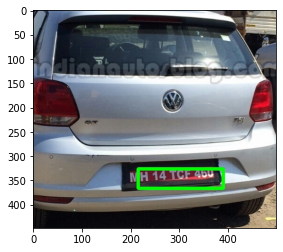

filepath -->C:\Zeeshan\Vscode_projects\Number_plate_detection\predictions\N183.jpeg


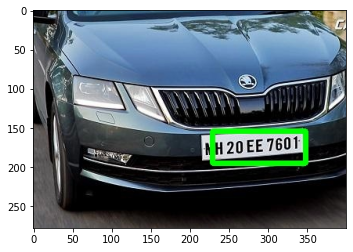

filepath -->C:\Zeeshan\Vscode_projects\Number_plate_detection\predictions\N20.jpeg


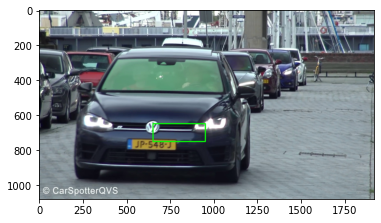

filepath -->C:\Zeeshan\Vscode_projects\Number_plate_detection\predictions\N36.jpeg


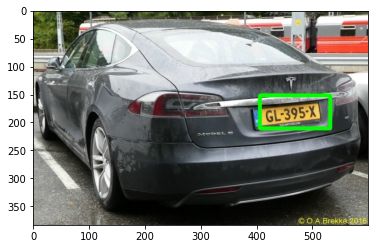

In [22]:
import cv2
import os
import matplotlib.pyplot as plt
path = os.getcwd()
file_dir = os.path.join(path,'predictions')
for files in os.listdir(file_dir):
    if files.endswith(('jpeg','jpg','png')):
        file_path = os.path.join(file_dir,files)
        print(f'filepath -->{file_path}')
        img = cv2.imread(file_path)
        plt.imshow(img)
        plt.show()

In [106]:
!pip install paddlepaddle
from paddleocr import PaddleOCR,draw_ocr

  Using cached protobuf-3.20.0-cp39-cp39-win_amd64.whl (904 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
paddleocr 2.6.1.3 requires opencv-contrib-python<=4.6.0.66, which is not installed.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
tensorboard 2.10.1 requires google-auth-oauthlib<0.5,>=0.4.1, but you have google-auth-oauthlib 0.8.0 which is incompatible.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
paddleocr 2.6.1.3 requires opencv-python<=4.6.0.66, but you have opencv-python 4.7.0.72 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.20.0 which is incompatible.
grpcio-status 1.51.3 requires protobuf>=4.21.6, but you have protobuf 3.20.0 which is incompatible.
grpc-google-iam-v1 0.12.6 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,

In [107]:
ocr_object = PaddleOCR(lang='en')

[2023/04/28 15:28:55] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\91986/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\91986/.paddleocr/whl\\rec\\en\\en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, re

In [10]:
ocr_object

In [20]:
result = ocr_object.ocr('drug1.jpeg',cls=True)
result

[2023/02/28 18:15:43] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/02/28 18:15:43] ppocr DEBUG: dt_boxes num : 6, elapse : 0.047443389892578125
[2023/02/28 18:15:43] ppocr DEBUG: rec_res num  : 6, elapse : 0.6310913562774658


[[[[[60.0, 19.0], [77.0, 19.0], [77.0, 27.0], [60.0, 27.0]],
   ('TAKT', 0.9089664816856384)],
  [[[103.0, 16.0], [148.0, 18.0], [148.0, 29.0], [102.0, 27.0]],
   ('CNATHAN DOE', 0.8838754296302795)],
  [[[185.0, 14.0], [215.0, 10.0], [216.0, 20.0], [186.0, 23.0]],
   ('TAREAS', 0.6512156128883362)],
  [[[99.0, 57.0], [177.0, 55.0], [178.0, 71.0], [100.0, 74.0]],
   ('TAKE AS NEEDED', 0.9248949289321899)],
  [[[99.0, 72.0], [169.0, 69.0], [169.0, 83.0], [100.0, 85.0]],
   ('2823357-15066', 0.8768492341041565)],
  [[[101.0, 100.0], [142.0, 105.0], [140.0, 116.0], [100.0, 110.0]],
   ('Pharmacy', 0.9965744018554688)]]]

In [33]:
result[0][0][1][0]

'TAKT'

In [40]:
result[0][1][1][0]

'CNATHAN DOE'

In [41]:
result[0][2][1][0]

'TAREAS'

In [42]:
result[0][3][1][0]

'TAKE AS NEEDED'

In [43]:
for i in range(3):
    print(result[0][i][1][0])

TAKT
CNATHAN DOE
TAREAS


In [ ]:
<xmin>1080</xmin>
			<ymin>633</ymin>
			<xmax>1471</xmax>
			<ymax>753</ymax>

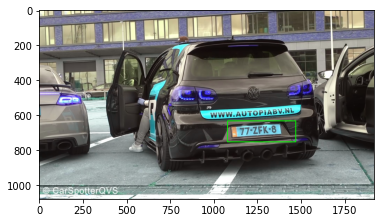

In [14]:
import cv2
img = cv2.imread('N1.jpeg')
img1 = cv2.rectangle(img,(1080,633),(1471,753),(0,255,0),3)

plt.imshow(img1)